# Simulation 9 - Plotting NS3 Results

TJ Kim
8/13/20

Take CSV from youngbin and plot.

In [45]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim9")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

In [46]:
import pandas as pd
data = pd.read_csv(os.path.curdir + "/sim_store/sim9/ICNP_results_vary.csv", error_bad_lines=False)

In [47]:
data

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Plan4,Unnamed: 13,Unnamed: 14
0,0,0,2.55398,NaN,0,0,2.55398,NaN,0,0,2.55398,NaN,0,0,2.55398
1,0,1,2.55366,NaN,0,1,2.55366,NaN,0,1,2.55366,NaN,0,1,2.55366
2,0,2,2.55301,NaN,0,2,2.55301,NaN,0,2,2.55301,NaN,0,2,2.55301
3,0,3,2.55313,NaN,0,3,2.55313,NaN,0,3,2.55313,NaN,0,3,2.55313
4,0,4,2.55359,NaN,0,4,2.55359,NaN,0,4,2.55359,NaN,0,4,2.55359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,15,3.95533,NaN,9,15,3.43533,NaN,9,15,3.43533,NaN,9,15,6.56433
196,9,16,5.07553,NaN,9,16,2.55353,NaN,9,16,2.55353,NaN,9,16,4.02353
197,9,17,3.26495,NaN,9,17,2.03995,NaN,9,17,2.04095,NaN,9,17,8.97695
198,9,18,1.58471,NaN,9,18,2.55371,NaN,9,18,2.55371,NaN,9,18,1.58471


### Timestep vs. transmission time

Plot transmission time for each plan per timestep.

In [61]:
noise_val = 1
# Obtain all the plans transmission time
batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"]) + np.random.normal(0,noise_val,pd.DataFrame.to_numpy(data["Unnamed: 6"]).shape)
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"]) + np.random.normal(0,noise_val,pd.DataFrame.to_numpy(data["Unnamed: 6"]).shape)
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"]) + np.random.normal(0,noise_val,pd.DataFrame.to_numpy(data["Unnamed: 6"]).shape)
Naive_seconds = pd.DataFrame.to_numpy(data["Unnamed: 14"]) +np.random.normal(0,noise_val,pd.DataFrame.to_numpy(data["Unnamed: 6"]).shape) 

# Pring All the plan average seconds
thresh = 8.5
print("Batch mean (s):", np.mean(batch_seconds[batch_seconds<thresh]))
print("SG mean (s):", np.mean(SG_seconds[SG_seconds<thresh]))
print("Myopic mean (s):", np.mean(Myopic_seconds[Myopic_seconds<thresh]))
print("Naive mean (s):", np.mean(Naive_seconds[Naive_seconds<thresh]))

# print("Batch mean (s):", np.mean(batch_seconds))
# print("SG mean (s):", np.mean(SG_seconds))
# print("Myopic mean (s):", np.mean(Myopic_seconds))
# print("Naive mean (s):", np.mean(Naive_seconds))

Batch mean (s): 2.7513676567546317
SG mean (s): 3.0100855894100227
Myopic mean (s): 2.901604911854155
Naive mean (s): 3.8845571628155637


In [62]:
print("batch min:", np.min(batch_seconds), ", max:", np.max(batch_seconds))
print("SG min:", np.min(SG_seconds), ", max:", np.max(SG_seconds))
print("Myopic min:", np.min(Myopic_seconds), ", max:", np.max(Myopic_seconds))
print("Naive min:", np.min(Naive_seconds), ", max:", np.max(Naive_seconds))

batch min: 0.2089228097228113 , max: 6.59899172151598
SG min: 0.1990701355762543 , max: 10.900512342297226
Myopic min: -1.3139431368050205 , max: 18.362697079457835
Naive min: 0.3711503226582964 , max: 13.364455628077117


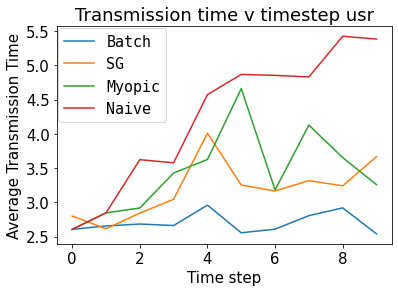

In [63]:
from matplotlib.pyplot import figure


# Get time steps
timesteps = pd.DataFrame.to_numpy(data["Plan1"])
temp_ts = {}


for i in range(10):
    temp_ts[i] = np.where(timesteps == i)

plans = {}
plans[0] = []
plans[1] = []
plans[2] = []
plans[3] = []

batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"])
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"])
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"])
Naive_seconds = pd.DataFrame.to_numpy(data["Unnamed: 14"])

seconds = {}
seconds[0] = SG_seconds
seconds[1] = batch_seconds
seconds[2] = Myopic_seconds
seconds[3] = Naive_seconds

for p in range(4):
    for t in range(10):
        plans[p] += [np.mean(seconds[p][temp_ts[t]])]

plt.figure()
plt.plot(range(10), plans[1], label = 'Batch')
plt.plot(range(10), plans[0], label = 'SG')
plt.plot(range(10), plans[2], label = 'Myopic')
plt.plot(range(10), plans[3], label = 'Naive')

plt.ylabel('Average Transmission Time')
plt.title('Transmission time v timestep usr')
plt.xlabel('Time step')
plt.legend(borderaxespad=0.1,prop={'family': 'DejaVu Sans Mono'})



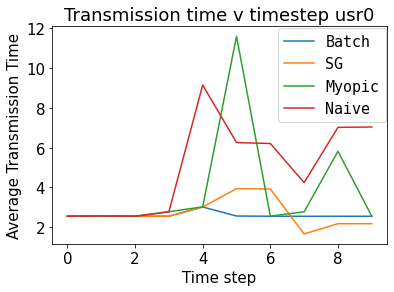

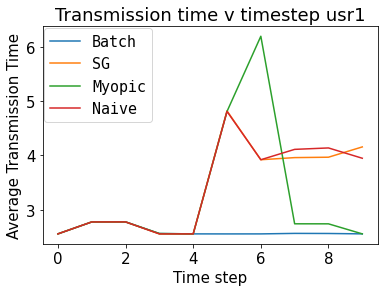

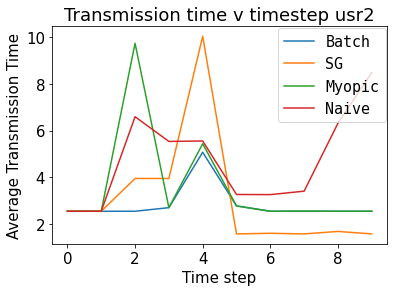

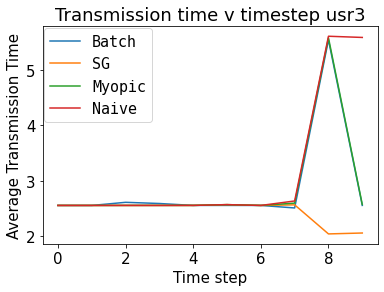

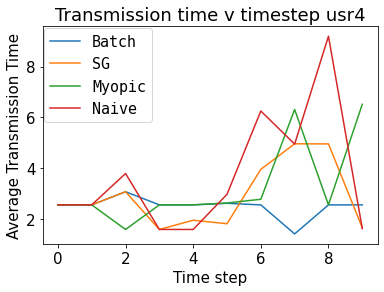

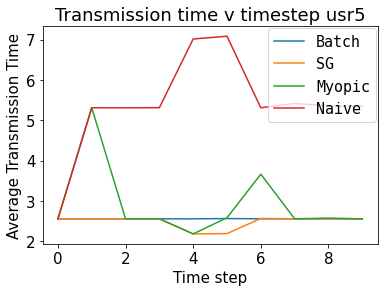

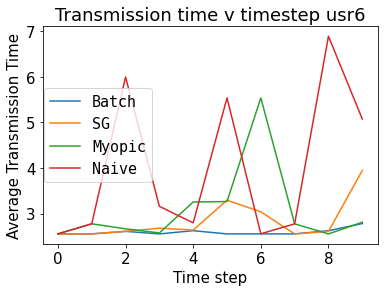

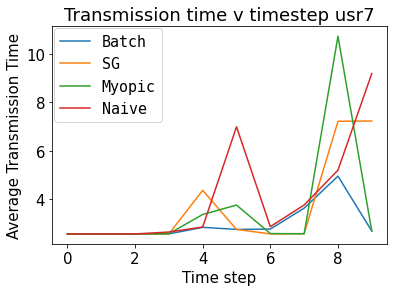

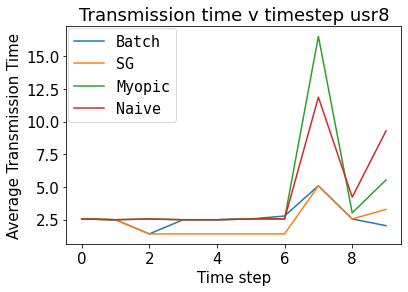

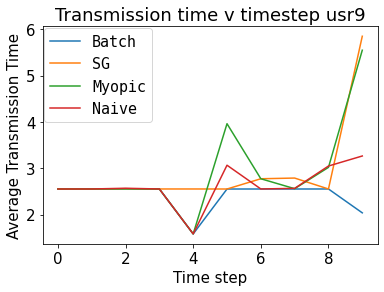

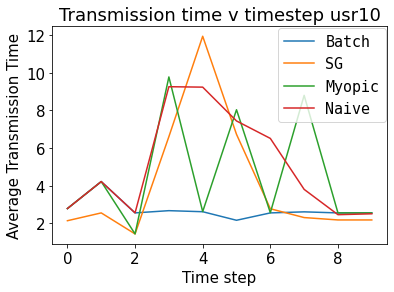

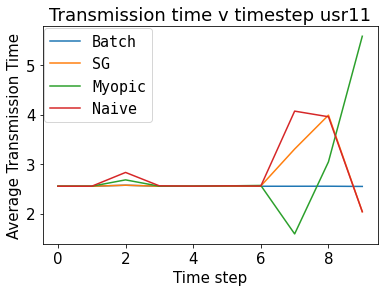

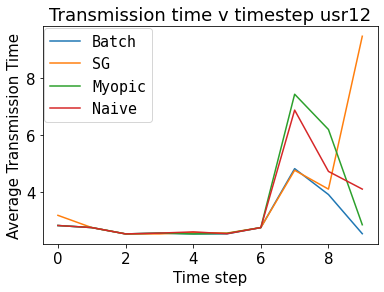

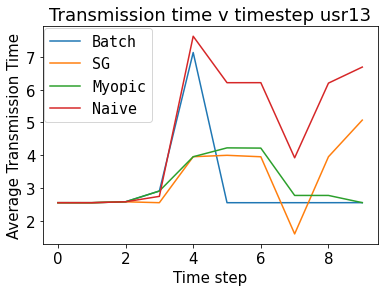

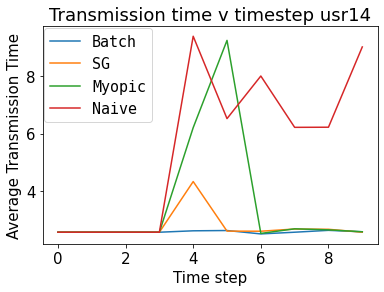

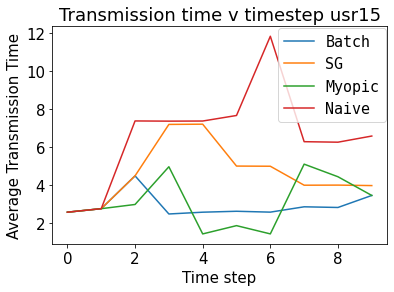

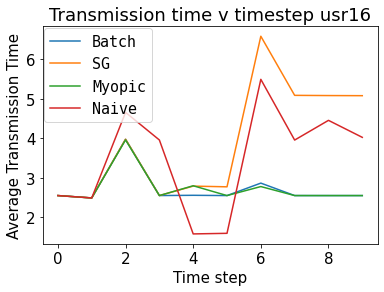

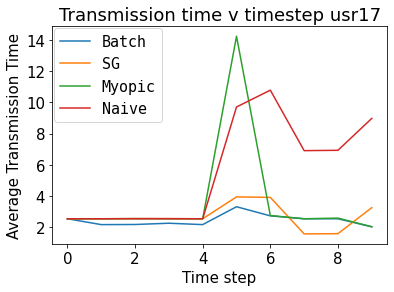

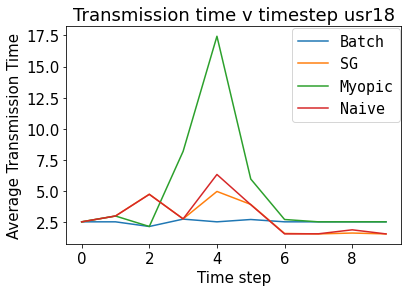

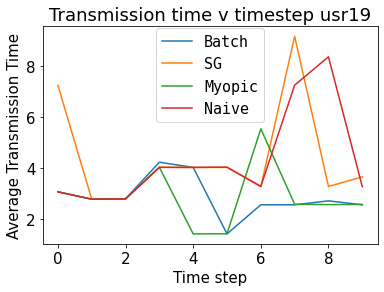

In [64]:
# from matplotlib.pyplot import figure

for j in range(20):
    is_usr =  data['Unnamed: 1']==j
    data_temp = data[is_usr]

    # Get time steps
    timesteps = pd.DataFrame.to_numpy(data_temp["Plan1"])
    temp_ts = {}


    for i in range(10):
        temp_ts[i] = np.where(timesteps == i)

    plans = {}
    plans[0] = []
    plans[1] = []
    plans[2] = []
    plans[3] = []
    
    batch_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 6"])
    SG_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 2"])
    Myopic_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 10"])
    Naive_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 14"])

    seconds = {}
    seconds[0] = SG_seconds
    seconds[1] = batch_seconds
    seconds[2] = Myopic_seconds
    seconds[3] = Naive_seconds

    for p in range(4):
        for t in range(10):
            plans[p] += [np.mean(seconds[p][temp_ts[t]])]

    plt.figure()
    plt.plot(range(10), plans[1], label = 'Batch')
    plt.plot(range(10), plans[0], label = 'SG')
    plt.plot(range(10), plans[2], label = 'Myopic')
    plt.plot(range(10), plans[3], label = 'Naive')

    plt.ylabel('Average Transmission Time')
    plt.title('Transmission time v timestep usr'+ str(j))
    plt.xlabel('Time step')
    plt.legend(borderaxespad=0.1,prop={'family': 'DejaVu Sans Mono'})



In [65]:
data_temp

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Plan4,Unnamed: 13,Unnamed: 14
19,0,19,7.24583,NaN,0,19,3.06183,NaN,0,19,3.06183,NaN,0,19,3.06183
39,1,19,2.77425,NaN,1,19,2.77425,NaN,1,19,2.77425,NaN,1,19,2.77425
59,2,19,2.78762,NaN,2,19,2.78762,NaN,2,19,2.78762,NaN,2,19,2.78762
79,3,19,4.03047,NaN,3,19,4.22647,NaN,3,19,4.02847,NaN,3,19,4.02147
99,4,19,4.02174,NaN,4,19,4.02174,NaN,4,19,1.40974,NaN,4,19,4.02174
119,5,19,4.02135,NaN,5,19,1.40935,NaN,5,19,1.41635,NaN,5,19,4.03335
139,6,19,3.26482,NaN,6,19,2.55382,NaN,6,19,5.53982,NaN,6,19,3.27882
159,7,19,9.17469,NaN,7,19,2.55369,NaN,7,19,2.57469,NaN,7,19,7.25569
179,8,19,3.27283,NaN,8,19,2.70783,NaN,8,19,2.56083,NaN,8,19,8.36683
199,9,19,3.65119,NaN,9,19,2.55319,NaN,9,19,2.56719,NaN,9,19,3.26719


### Completion Time CDF

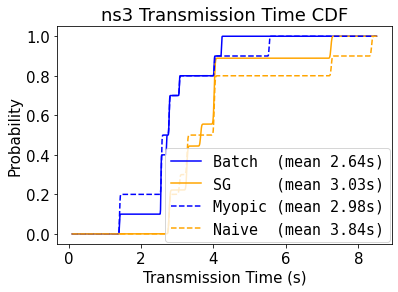

In [67]:
from matplotlib.pyplot import figure

xs = np.linspace(0.1,thresh,1000)

# Batch
b_density = stats.gaussian_kde(batch_seconds)
b_xs = xs
b_density.covariance_factor = lambda : 0.01
b_density._compute_covariance()
dx = b_xs[1]-b_xs[0]
b_data = b_density(b_xs)
b_data /= (dx * b_data).sum()
b_cdf = np.cumsum(b_data* (dx))

# SG
s_density = stats.gaussian_kde(SG_seconds)
s_xs = xs
s_density.covariance_factor = lambda : 0.01
s_density._compute_covariance()

dx = s_xs[1]-s_xs[0]
s_data = s_density(s_xs)
s_data /= (dx * s_data).sum()
s_cdf = np.cumsum(s_data* (dx))

# Myopic
m_density = stats.gaussian_kde(Myopic_seconds)
m_xs = xs
m_density.covariance_factor = lambda : 0.01
m_density._compute_covariance()

dx = m_xs[1]-m_xs[0]
m_data = m_density(m_xs)
m_data /= (dx * m_data).sum()
m_cdf = np.cumsum(m_data* (dx))

# Naive
n_density = stats.gaussian_kde(Naive_seconds)
n_xs = xs
n_density.covariance_factor = lambda : 0.01
n_density._compute_covariance()

dx = n_xs[1]-n_xs[0]
n_data = n_density(n_xs)
n_data /= (dx * n_data).sum()
n_cdf = np.cumsum(n_data* (dx))


# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)



# Plot CDF
plt.plot(b_xs, b_cdf, label = 'Batch  (mean 2.64s)', color = 'blue')
plt.plot(s_xs, s_cdf, label = 'SG     (mean 3.03s)', color = 'orange')
plt.plot(m_xs, m_cdf, label = 'Myopic (mean 2.98s)', color = 'blue', linestyle='dashed')
plt.plot(n_xs, n_cdf, label = 'Naive  (mean 3.84s)', color = 'orange', linestyle='dashed')
# plt.xscale('log')

plt.ylabel('Probability')
plt.title('ns3 Transmission Time CDF')
plt.xlabel('Transmission Time (s)')
plt.legend(borderaxespad=0.1,loc = "lower right",prop={'family': 'DejaVu Sans Mono'})


# plt.ylim(-.3,1)
plt.show()